# Notebook

## This notebook looks at cloud cover for pruning

> this will done in a more intelligent way for Collection-2

> this could be added to indexing as well for this proxyDataLake


1. Load AOI from GeoJson

In [1]:
!ls

00-Lake-Isabella-animation-sadness-mitigation-mp4.ipynb
01-Lake-Isabella-animation-sadness-data-fill-sucks-gif.ipynb
01-Sanath-p045r031-Lake-Isabella-mp4.ipynb
01-Sanath-p045r031-Lake-Isabella.ipynb
99-Lake-Isabella-animation-cloud-prune.ipynb
broken-isabella-animation.gif
isa.gif
isabella-lake.geojson
isabella.mp4
mitigated-isabella-animation.mp4


In [2]:
from datetime import datetime

In [3]:
my_aoi_file = 'isabella-lake.geojson'
from notebookLib.nb_display import Ldisplay
ld = Ldisplay()
ld.map_geojson(my_aoi_file)

creating Ldisplay class


In [4]:
import json 

with open(my_aoi_file) as f:
    data = json.load(f)
    
data
    


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-118.60565185546874, 35.5506639937922],
      [-118.22937011718749, 35.5506639937922],
      [-118.22937011718749, 35.80055084130363],
      [-118.60565185546874, 35.80055084130363],
      [-118.60565185546874, 35.5506639937922]]]}}]}

In [5]:
coord = data['features'][0]['geometry']['coordinates']

x1 = coord[0][0][0]
x1

-118.60565185546874

In [6]:
y1 = coord[0][0][1]
y1

35.5506639937922

In [7]:
x2 = coord[0][2][0]
x2

-118.22937011718749

In [8]:
y2 = coord[0][2][1]
y2

35.80055084130363

In [9]:
import datacube
from odc.ui import with_ui_cbk

In [10]:
dc = datacube.Datacube()
ds = dc.find_datasets(product= "c1l2scenealbers",
                     x=(x1, x2),
                y=(y1, y2),
                     time=("2016-01-01", "2016-12-31"))

In [11]:
len(ds)

91

In [12]:
dir(ds[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_gs',
 'archived_time',
 'bounds',
 'center_time',
 'crs',
 'extent',
 'format',
 'id',
 'indexed_by',
 'indexed_time',
 'is_active',
 'is_archived',
 'key_time',
 'local_path',
 'local_uri',
 'managed',
 'measurements',
 'metadata',
 'metadata_doc',
 'metadata_doc_without_lineage',
 'metadata_type',
 'sources',
 'time',
 'transform',
 'type',
 'uri_scheme',
 'uris']

In [13]:
ds[0].metadata_doc['extent']['center_dt']

'2016-11-13 18:28:16.119296Z'

In [14]:
ds[0].metadata_doc

{'id': 'fd1fc18f-bdf3-4b63-964e-de05ff07dd23',
 'image': {'bands': {'nir': {'path': 's3://dev-usgs-landsat/collection1/level2/albers/oli-tirs/2016/041/035/LC08_L1TP_041035_20161113_20170219_01_A1/LC08_L1TP_041035_20161113_20170219_01_A1_sr_band5.tif',
    'layer': 1},
   'red': {'path': 's3://dev-usgs-landsat/collection1/level2/albers/oli-tirs/2016/041/035/LC08_L1TP_041035_20161113_20170219_01_A1/LC08_L1TP_041035_20161113_20170219_01_A1_sr_band4.tif',
    'layer': 1},
   'blue': {'path': 's3://dev-usgs-landsat/collection1/level2/albers/oli-tirs/2016/041/035/LC08_L1TP_041035_20161113_20170219_01_A1/LC08_L1TP_041035_20161113_20170219_01_A1_sr_band2.tif',
    'layer': 1},
   'green': {'path': 's3://dev-usgs-landsat/collection1/level2/albers/oli-tirs/2016/041/035/LC08_L1TP_041035_20161113_20170219_01_A1/LC08_L1TP_041035_20161113_20170219_01_A1_sr_band3.tif',
    'layer': 1},
   'swir_1': {'path': 's3://dev-usgs-landsat/collection1/level2/albers/oli-tirs/2016/041/035/LC08_L1TP_041035_201611

In [15]:
red_path = ds[0].metadata_doc['image']['bands']['red']['path']
red_path

's3://dev-usgs-landsat/collection1/level2/albers/oli-tirs/2016/041/035/LC08_L1TP_041035_20161113_20170219_01_A1/LC08_L1TP_041035_20161113_20170219_01_A1_sr_band4.tif'

In [16]:
import os

base = os.path.basename(red_path)

base

'LC08_L1TP_041035_20161113_20170219_01_A1_sr_band4.tif'

In [17]:
a = base.split('_')
a

['LC08',
 'L1TP',
 '041035',
 '20161113',
 '20170219',
 '01',
 'A1',
 'sr',
 'band4.tif']

In [18]:
p_r = a[2]
p_r

'041035'

In [19]:

def return_path_row(data_set_object):
    dso = data_set_object
    
    red_path = dso.metadata_doc['image']['bands']['red']['path']
    base = os.path.basename(red_path)
    a = base.split('_')
    PATH_ROW=a[2]
    return PATH_ROW

In [20]:
p_r = return_path_row(ds[0])
p_r

'041035'

In [21]:
# https://github.com/tonybutzer/odc-lcmap/blob/1b872493005fe0be56a42284fc131a9d593783ae/anotebooks/projection_notebook/chip4.ipynb

In [22]:
def find_pretty_scenes(ds_array, fav_path, fav_row):
    fav_p_r = fav_path + fav_row
    dsa = ds_array
    pretty_dsa = []
    for i in range(len(ds_array)):
        this_p_r = return_path_row(ds[i])
        if fav_p_r == this_p_r:
            # HACK this needs to be fixed in indexing
            #ds.center_time = dsa[i].metadata_doc['extent']['center_dt']
            pretty_dsa.append(dsa[i])
            print(i,this_p_r)
            
    return pretty_dsa

In [23]:
fav_p = '041'
fav_r = '035'
psa = find_pretty_scenes(ds, fav_p, fav_r)

0 041035
1 041035
4 041035
5 041035
8 041035
9 041035
12 041035
13 041035
18 041035
19 041035
23 041035
24 041035
27 041035
28 041035
31 041035
32 041035
34 041035
35 041035
37 041035
38 041035
42 041035
43 041035
45 041035
46 041035
48 041035
49 041035
53 041035
54 041035
58 041035
59 041035
62 041035
63 041035
67 041035
68 041035
71 041035
72 041035
75 041035
76 041035
78 041035
79 041035
82 041035
83 041035
85 041035
86 041035
88 041035
89 041035


In [24]:
len(psa)

46

In [25]:
psa[0]

Dataset <id=fd1fc18f-bdf3-4b63-964e-de05ff07dd23 type=c1l2scenealbers location=collection1/level2/albers/oli-tirs/2016/041/035/LC08_L1TP_041035_20161113_20170219_01_A1/LC08_L1TP_041035_20161113_20170219_01_A1.xml:>

In [54]:
psa[0].uris[0]

'collection1/level2/albers/oli-tirs/2016/041/035/LC08_L1TP_041035_20161113_20170219_01_A1/LC08_L1TP_041035_20161113_20170219_01_A1.xml:'

In [42]:
dir(psa[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_gs',
 'archived_time',
 'bounds',
 'center_time',
 'crs',
 'extent',
 'format',
 'id',
 'indexed_by',
 'indexed_time',
 'is_active',
 'is_archived',
 'key_time',
 'local_path',
 'local_uri',
 'managed',
 'measurements',
 'metadata',
 'metadata_doc',
 'metadata_doc_without_lineage',
 'metadata_type',
 'sources',
 'time',
 'transform',
 'type',
 'uri_scheme',
 'uris']

In [75]:
import boto3
def get_xml_obj(psa_item):
    #print(psa_item)
    bucket_name = "dev-usgs-landsat"
    xml_meta_path = psa_item.uris[0]
    print()
    print(xml_meta_path)
    xml_meta_path = xml_meta_path.replace(':','')
    print()
    print(xml_meta_path)
    
    key = xml_meta_path
    s3 = boto3.resource('s3')
    obj = s3.Object(bucket_name, key)
    print("Bucket : %s", bucket_name)

    print("Processing %s", xml_meta_path)
    raw_string = obj.get()['Body'].read().decode('utf8')
    print(raw_string)

    

## No Simple Cloud Cover Metadata like Collection-2 so punt for now

### STAC and Collection-2 have better methods so defer

In [76]:
get_xml_obj(psa[0])


collection1/level2/albers/oli-tirs/2016/041/035/LC08_L1TP_041035_20161113_20170219_01_A1/LC08_L1TP_041035_20161113_20170219_01_A1.xml:

collection1/level2/albers/oli-tirs/2016/041/035/LC08_L1TP_041035_20161113_20170219_01_A1/LC08_L1TP_041035_20161113_20170219_01_A1.xml
Bucket : %s dev-usgs-landsat
Processing %s collection1/level2/albers/oli-tirs/2016/041/035/LC08_L1TP_041035_20161113_20170219_01_A1/LC08_L1TP_041035_20161113_20170219_01_A1.xml
<?xml version="1.0" encoding="UTF-8"?>

<espa_metadata version="2.0"
xmlns="http://espa.cr.usgs.gov/v2"
xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
xsi:schemaLocation="http://espa.cr.usgs.gov/v2 http://espa.cr.usgs.gov/schema/espa_internal_metadata_v2_0.xsd">

    <global_metadata>
        <data_provider>USGS/EROS</data_provider>
        <satellite>LANDSAT_8</satellite>
        <instrument>OLI_TIRS</instrument>
        <acquisition_date>2016-11-13</acquisition_date>
        <scene_center_time>18:28:16.119296Z</scene_center_time>
       

In [26]:
pretty_datasets = psa

In [27]:
EPSG='5072'


'''
meas=[ 
    'blue',                              
    'green',                            
    'red',                                
]
'''

meas=[ 
    'swir_1',                              
    'nir',                            
    'green',                                
]

'''
meas=['coastal_aerosol', 
    'blue',                              
    'green',                            
    'red',                                
    'nir',                              
    'swir_1',                             
    'swir_2',                             
    'quality_l2_aerosol']  
'''

## KEEP data range smaller this time - someday get better grasp on memory, docker, jupyter equation

## KEEP date range smaller this time

ds2 = dc.load(product="c1l2scenealbers",
                datasets=pretty_datasets,
                measurements=meas, 
                output_crs='epsg:' + EPSG,
                resolution=(-30, 30),
                x=(x1, x2),
                y=(y1, y2),
                progress_cbk=with_ui_cbk(),
                time=("2016-09-01", "2016-12-31")
              
             )

In [28]:
ds2

<xarray.Dataset>
Dimensions:  (time: 23, x: 1313, y: 1171)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-14T18:28:01.110591 ... 2016-12-31T18:28:09.865399
  * y        (y) float64 1.656e+06 1.656e+06 1.656e+06 ... 1.621e+06 1.621e+06
  * x        (x) float64 -2.012e+06 -2.012e+06 ... -1.973e+06 -1.973e+06
Data variables:
    swir_1   (time, y, x) uint16 3586 3142 2522 2126 ... 3358 3078 3203 2392
    nir      (time, y, x) uint16 3229 2721 2181 1914 ... 2698 2598 2566 1802
    green    (time, y, x) uint16 1073 920 695 594 681 ... 1398 1388 1443 987
Attributes:
    crs:      epsg:5072

Generating 23 frame animation
    Exporting animation to ./cloudfree-isabella-animation.mp4


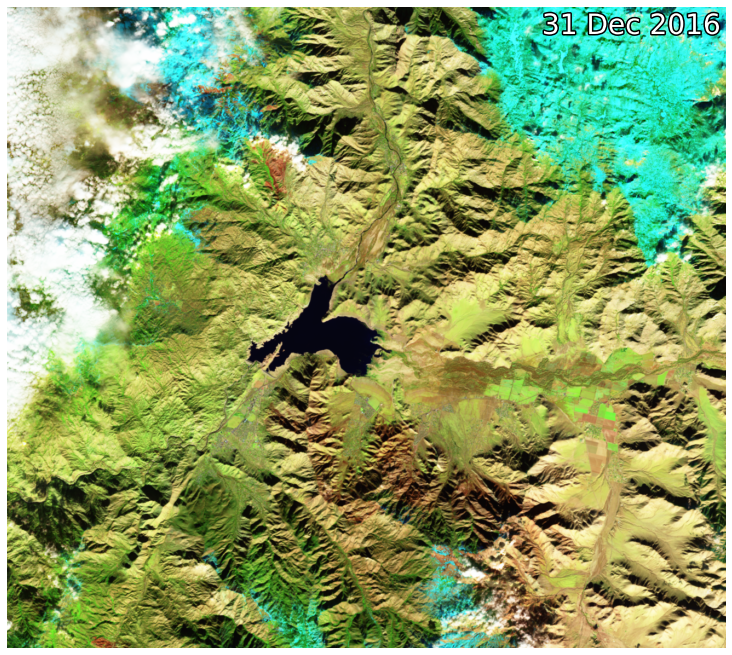

In [30]:
%matplotlib inline
from notebookLib.nb_animate import nb_animated_timeseries

nb_animated_timeseries(ds2,output_path='./cloudfree-isabella-animation.mp4',bands = ['swir_1', 'nir', 'green'], time_dim='time',  
      percentile_stretch=(.2,.85), interval=600)